# Generate the website dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys

In [17]:
# !{sys.executable} -m pip install Faker

In [4]:
# tools for generating random data
import datetime
from faker import Faker
import random
from scipy.stats.distributions import bernoulli

faker = Faker()

In [5]:
N = 2000  # number of visitors total
rvA = bernoulli(p=0.42)  # A conversion rate
rvB = bernoulli(p=0.56)  # B conversion rate

visits_list = []

tstart = datetime.datetime.now()

for i in range(N):
    dt = datetime.timedelta(seconds=random.randint(1, 30))
    time = (tstart + dt).strftime('%d/%b/%Y:%H:%M:%S')
    version = random.choice(["A", "B"])
    ip = faker.ipv4()
    if version == "A":
        bought = rvA.rvs(1)[0]
    if version == "B":
        bought = rvB.rvs(1)[0]
    visit = (ip, version, bought)
    visits_list.append(visit)

visits = pd.DataFrame(visits_list, columns=["ip", "version", "bought"])


In [6]:
visits

,ip,version,bought
0,223.113.235.58,B,1
1,137.7.38.35,B,1
2,162.172.99.158,A,1
3,129.180.51.13,A,1
4,27.171.162.204,B,0
...,...,...,...
1995,209.148.144.201,A,0
1996,15.246.242.146,B,1
1997,35.242.237.194,A,0
1998,14.76.169.8,B,1


In [7]:
visits.groupby("version")["bought"].count()

version
A     997
B    1003
Name: bought, dtype: int64

In [8]:
visits.groupby("version")["bought"].value_counts()

version  bought
A        0         606
         1         391
B        1         556
         0         447
Name: bought, dtype: int64

In [9]:
visits[visits["version"]=="A"].count()

ip         997
version    997
bought     997
dtype: int64

In [10]:
visits.groupby("version")["bought"].value_counts().unstack()

bought,0,1
version,,
A,606,391
B,447,556


In [11]:
ct = pd.crosstab(index=visits["version"], columns=visits["bought"],
                 margins=True, margins_name="TOTAL")
ct

bought,0,1,TOTAL
version,,,
A,606,391,997
B,447,556,1003
TOTAL,1053,947,2000


In [12]:
pA = ct.loc["A",1] / ct.loc["A","TOTAL"]
pB = ct.loc["B",1] / ct.loc["B","TOTAL"]
pA, pB

(0.3921765295887663, 0.5543369890329013)

In [13]:
print(ct.to_latex())

\begin{tabular}{lrrr}
\toprule
bought &     0 &    1 &  TOTAL \\
version &       &      &        \\
\midrule
A       &   606 &  391 &    997 \\
B       &   447 &  556 &   1003 \\
TOTAL   &  1053 &  947 &   2000 \\
\bottomrule
\end{tabular}



In [14]:
pA*(1-pA)

0.23837409922847783

Text(0, 0.5, 'proportion bought')

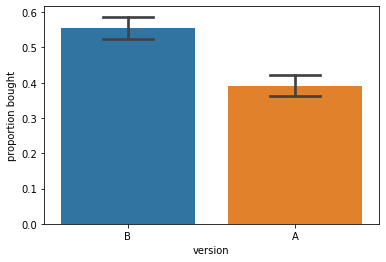

In [27]:
ax = sns.barplot(x="version", y="bought", data=visits, capsize=0.3)
ax.set_ylabel("proportion bought")

In [28]:
filename = "figures/compare_visitors.pdf"
ax.figure.tight_layout()
ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [26]:
!open .

# Full script

TODO: generate fake web server log using https://github.com/kiritbasu/Fake-Apache-Log-Generator/blob/master/apache-fake-log-gen.py

In [16]:
faker.user_agent()

'Mozilla/5.0 (X11; Linux i686; rv:1.9.6.20) Gecko/2017-04-17 18:21:28 Firefox/11.0'